symbols: 8 symbol size: 131072 avg exec time: 0.056884765625
symbols: 16 symbol size: 65536 avg exec time: 0.052978515625
symbols: 32 symbol size: 32768 avg exec time: 0.052978515625
symbols: 8 symbol size: 1310720 avg exec time: 1.03515625
symbols: 16 symbol size: 655360 avg exec time: 0.972900390625
symbols: 32 symbol size: 327680 avg exec time: 0.89599609375
symbols: 8 symbol size: 13107200 avg exec time: 9.31298828125
symbols: 16 symbol size: 6553600 avg exec time: 12.4169921875
symbols: 32 symbol size: 3276800 avg exec time: 10.7351074219
symbols: 8 symbol size: 16777216 avg exec time: 11.7880859375
symbols: 16 symbol size: 8388608 avg exec time: 11.9150390625
symbols: 32 symbol size: 4194304 avg exec time: 13.7180175781
symbols: 8 symbol size: 33554432 avg exec time: 24.3049316406
symbols: 16 symbol size: 16777216 avg exec time: 23.8818359375
symbols: 32 symbol size: 8388608 avg exec time: 23.9809570312
symbols: 8 symbol size: 67108864 avg exec time: 49.0700683594
symbols: 16 sym

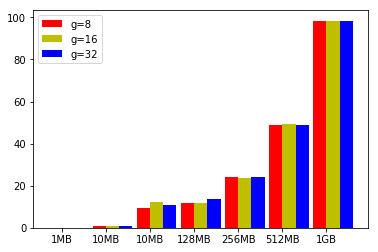

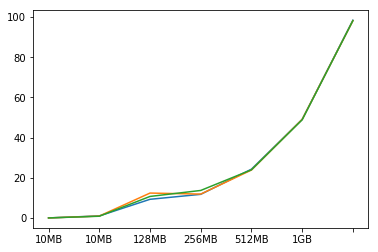

In [35]:
import json 

from os import listdir
from os.path import isfile, join

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

class Result(object):
    
    def __init__(self, file_path):
        temp = file_path.split('_')
        self.symbols = int(temp[6])
        self.symbol_size = int(temp[7])
        self.results = read_result(file_path)      
        
    def data_size(self, unit=None):
        
        if unit == None:
            return self.symbols * self.symbol_size
        
    def less(self, other):
        if self.data_size() < other.data_size():
            return True
        elif self.data_size() == other.data_size():
            return self.symbols < other.symbols
        else:
            return False
        
    def __get_exec_time(self, obj, unit=None):
        if not unit:
            return obj['end'] - obj['start']
        elif unit == 'ms':
            return (obj['end']/1000.0) - (obj['start']/1000.0)
        elif unit == 'sec':
            return (obj['end']/1000000.0) - (obj['start']/1000000.0)
            

    def get_avg_exec_time(self, unit=None):
        
        total = 0.0
        for res in self.results:
            total = self.__get_exec_time(res, unit)
        return total
        
    
    @staticmethod
    def read_result(path):
        with open(path) as f:
            data = json.load(f)
            return data
        
def print_results(results):
    
    for res in results: 
        print('symbols: {} symbol size: {} avg exec time: {}'.format(res.symbols, res.symbol_size, res.get_avg_exec_time('ms')))

        
                
def sort(results):
    results = np.array(results)
    a = [r.symbols for r in results]
    b = np.argsort(a)
    results = results[b]

    a = [r.data_size() for r in results]
    b = np.argsort(a, kind='mergesort')
    results = results[b]
    return results

def read_result(path):
    with open(path) as f:
        data = json.load(f)
        return data
    
def get_exec_time(obj):
    return obj['end'] - obj['start']

def all_of_g(results, g):
    
    return [r.get_avg_exec_time('ms') for r in results if r.symbols == g]

def bar_plot(results):
    
    gen_eight = all_of_g(results, 8)
    gen_sixteen = all_of_g(results, 16)
    gen_thirty_two = all_of_g(results, 32)

    
    N = 7


    fig, ax = plt.subplots()

    ind = np.arange(N)    # the x locations for the groups
    width = 0.30         # the width of the bars
    p1 = ax.bar(ind, gen_eight, width, color='r')
    p2 = ax.bar(ind+width, gen_sixteen, width, color='y')
    p3 = ax.bar(ind+width+width, gen_thirty_two, width, color='b')



    #ax.set_title('Scores by group and gender')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(('1MB', '10MB', '10MB', '128MB', '256MB', '512MB', '1GB'))

    ax.legend((p1[0], p2[0], p3[0]), ('g=8', 'g=16','g=32'))
    ax.autoscale_view()

    plt.show()
    

def line_plot(results):
    gen_eight = all_of_g(results, 8)
    gen_sixteen = all_of_g(results, 16)
    gen_thirty_two = all_of_g(results, 32)
    
    N = 7


    fig, ax = plt.subplots()

    ind = np.arange(N)    # the x locations for the groups
    width = 0.15         # the width of the bars
    
    plt.plot(gen_eight)
    plt.plot(gen_sixteen)
    plt.plot(gen_thirty_two)

    ax.set_xticklabels(('1MB', '10MB', '10MB', '128MB', '256MB', '512MB', '1GB'))

    # ax.legend((p1[0], p2[0], p3[0]), ('g=8', 'g=16','g=32'))
    ax.autoscale_view()

    plt.show()

path = '../results/'
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]



results = list()
for file in onlyfiles:
    temp = path + file
    result = Result(temp)
    results.append(result)

results = sort(results)
print_results(results)
bar_plot(results)
line_plot(results)



#results = sort_results_by_data_size(results)



#print(get_avg_exec_time(a.results, 'sec'))

    